In [201]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


### Thu 3


In [202]:
# 1 sample Vectorized Linear Regression

X = np.array([[3,12],
              [4,13],
              [5,14],
              [6,15]])

Y = np.array([60,55,66,93])

# [b, w1, w2] - khởi tạo tham số
theta = np.array([10, 3, 2])

In [203]:
# Thêm cột bias
X_bias = np.c_[np.ones(X.shape[0]), X]
X_bias

array([[ 1.,  3., 12.],
       [ 1.,  4., 13.],
       [ 1.,  5., 14.],
       [ 1.,  6., 15.]])

In [204]:
print(f'Input shape: {X_bias.shape}')
print(f'Output shape: {Y.shape}')
print(f'Theta shape: {theta.shape}')

Input shape: (4, 3)
Output shape: (4,)
Theta shape: (3,)


In [205]:
def predict(X,theta):
    return np.dot(X,theta)

def compute_loss(y_hat,y):
    return (y_hat - y)**2

def compute_gradient(y_hat,y,X):    
    return 2*X*(y_hat - y)

def update_gradient(theta,gradient,lr):
    theta = theta - lr*gradient
    return theta



In [206]:
X_test = np.array([[1, 4, 13]])
y_hat = predict(X_test, theta)
loss = compute_loss(y_hat, Y)

print(y_hat[0])
print(f'Loss before training: {loss}')

48
Loss before training: [ 144   49  324 2025]


In [207]:
epoch = 4
lr = 0.001
N = len(Y)
losses = []

for i in range(epoch):
    epoch_loss = []
    for index in range(N):
        X_i = X_bias[index,:]
        y_i = Y[index]
        
        y_hat = predict(X_i,theta)
        
        loss = compute_loss(y_hat,y_i)
        epoch_loss.append(loss)
        
        gradient = compute_gradient(y_hat,y_i,X_i)
        theta = update_gradient(theta,gradient,lr)
    
    epoch_loss = sum(epoch_loss)/len(epoch_loss)
    losses.append(epoch_loss)
    print(f'Epoch {i+1}: Loss = {epoch_loss}, theta = {theta}')

final_theta = theta
losses, final_theta
    

Epoch 1: Loss = 234.6004982265337, theta = [10.09833181  3.47050512  3.35549142]
Epoch 2: Loss = 130.86470802439825, theta = [10.10382489  3.56374101  3.49816499]
Epoch 3: Loss = 138.41841820731048, theta = [10.09861696  3.61319006  3.50074271]
Epoch 4: Loss = 139.08577029797192, theta = [10.09220039  3.65739307  3.48719661]


([234.6004982265337,
  130.86470802439825,
  138.41841820731048,
  139.08577029797192],
 array([10.09220039,  3.65739307,  3.48719661]))

In [208]:
X_test = np.array([[1, 4, 13]])
y_hat = predict(X_test, theta)
loss = compute_loss(y_hat, Y)
print(f'Loss after training: {loss}')

Loss after training: [101.10963271 226.66291844  16.44568983 526.4579469 ]


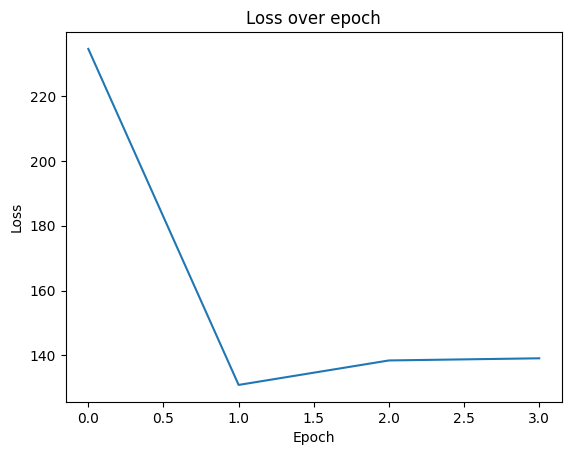

In [209]:
plt.plot(losses)
plt.title('Loss over epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [210]:
# N samples Vectorized Linear Regression
X = np.array([[3,12],
              [4,13],
              [5,14],
              [6,15]])

X_bias = np.c_[np.ones(X.shape[0]), X]

y = np.array([60,55,66,93])

# [b, w1, w2] - khởi tạo tham số
theta = np.array([10, 3, 2])

In [211]:
def predict(X,theta):
    return X.dot(theta)

def compute_loss(y_hat,y):
    N = y.shape[0]
    
    return np.sum((y_hat-y)**2)/N

def compute_gradient(y_hat,y,X):
    n = y.shape[0]
    k = 2*(y_hat - y)
    
    return X.T.dot(k) / n

def update_gradient(theta,gradient,lr):
    theta = theta - lr*gradient
    return theta


In [212]:
X_test = np.array([[1, 4, 13]])
y_hat = predict(X_test, theta)
loss = compute_loss(y_hat, y)
print(f'Loss before training: {loss}')

Loss before training: 635.5


In [213]:
# Các thông số huấn luyện
epoch_max = 4
lr = 0.001  # Learning rate
N = len(y)
losses = []

# Huấn luyện qua các epoch
for epoch in range(epoch_max):
    # Dự đoán giá trị
    y_hat = predict(X_bias, theta)

    # Tính Loss (MSE) - Chia cho N
    loss = compute_loss(y_hat, y)
    losses.append(loss)

    # Tính gradient
    gradient = compute_gradient(y_hat, y, X_bias)

    # Cập nhật tham số
    theta = update_gradient(theta, gradient, lr)

    print(f'Epoch {epoch+1}: Loss = {loss}, theta = {theta}')

final_theta = theta
losses, final_theta

Epoch 1: Loss = 433.0, theta = [10.036  3.177  2.501]
Epoch 2: Loss = 207.64782100000002, theta = [10.056808  3.283941  2.795213]
Epoch 3: Loss = 129.43427922136902, theta = [10.06866816  3.34961385  2.96762733]
Epoch 4: Loss = 102.26797535859747, theta = [10.07525837  3.39097666  3.06830194]


([433.0, 207.64782100000002, 129.43427922136902, 102.26797535859747],
 array([10.07525837,  3.39097666,  3.06830194]))

In [214]:
# After training prediction
X_test = np.array([[1, 4, 13]])
y_hat = predict(X_test, theta)
loss = compute_loss(y_hat, y)
print(f'Loss after training: {loss}')

Loss after training: 239.97983168947812


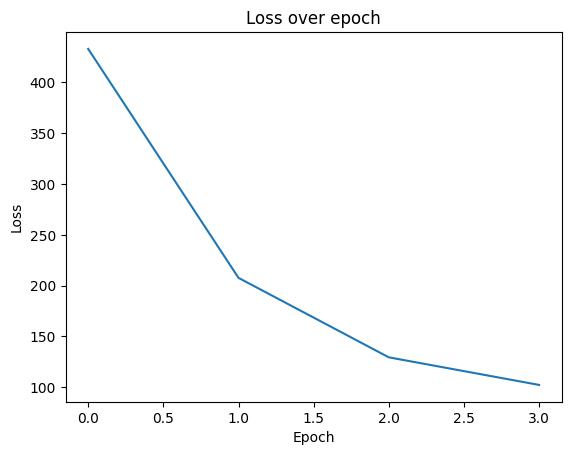

In [215]:
plt.plot(losses)
plt.title('Loss over epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Thu 4

In [216]:
data = np.genfromtxt('data.csv', delimiter=',').tolist()
print(data)

[[6.7, 9.1], [4.6, 5.9], [3.5, 4.6], [5.5, 6.7]]


In [217]:
def get_column(data,index):
    result = [row[index] for row in data]
    return result

In [218]:
# get column index=0
column0 = get_column(data, 0)
print(column0)

# get column index=1
column1 = get_column(data, 1)
print(column1)

[6.7, 4.6, 3.5, 5.5]
[9.1, 5.9, 4.6, 6.7]


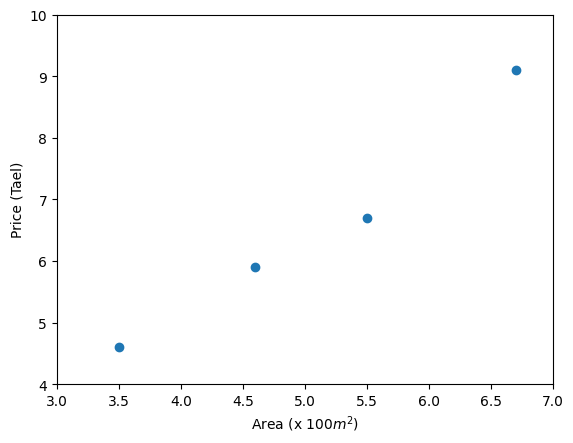

In [219]:
n = len(column0)

plt.scatter(column0, column1)
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [220]:
def predict(x,w,b):
    return x*w + b

def compute_gradient(x,y_hat,y):
    dw = 2*x*(y_hat-y)
    db = 2*(y_hat-y)
    
    return dw,db

def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    
    return w_new,b_new


In [221]:
x_data = get_column(data, 0)
y_data = get_column(data, 1)
N = len(x_data)

print(f'areas: {x_data}')
print(f'prices: {y_data}')
print(f'data_size: {N}')

areas: [6.7, 4.6, 3.5, 5.5]
prices: [9.1, 5.9, 4.6, 6.7]
data_size: 4


In [222]:
b = 0.04
w = -0.34
lr = 0.02
epoch = 10
losses = []

for i in range(epoch):
    for j in range(N):
        x = x_data[j]
        y = y_data[j]
        
        y_hat = predict(x,w,b)
        
        loss = (y_hat-y)**2
        losses.append(loss)
        
        dw,db = compute_gradient(x,y_hat,y)
        
        w,b = update_weight(w,b,lr,dw,db)

print(w, b)

1.192491163985917 0.017371370027855694


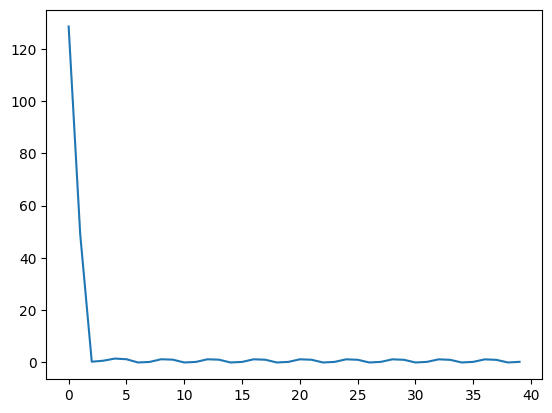

In [223]:
import matplotlib.pyplot as plt
plt.plot(losses) 

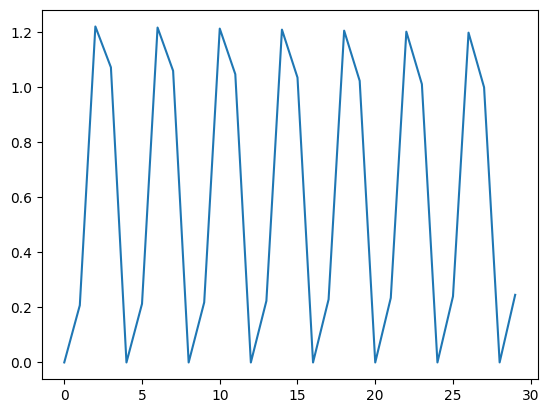

In [224]:
import matplotlib.pyplot as plt
plt.plot(losses[10:]) 

In [225]:
area_real = 6
predicted_price = area_real*w + b
print('predicted_price: ', predicted_price)

predicted_price:  7.172318353943358


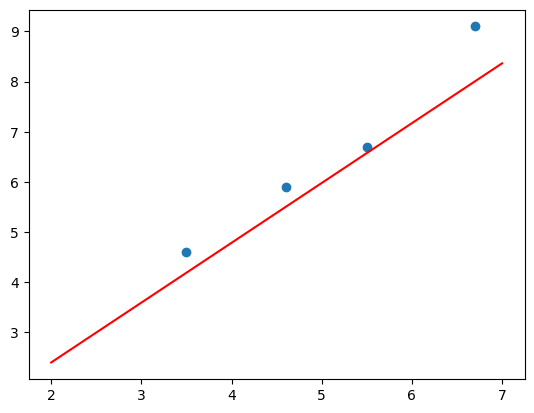

In [226]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

data = np.genfromtxt('data.csv', delimiter=',').tolist()
areas  = get_column(data, 0)
prices = get_column(data, 1)
plt.scatter(areas, prices)

In [227]:
#MAE
b = 0.04
w = -0.34
lr = 0.01
epoch = 20
losses = []

def gradient(y_hat,y,x):
    dw = x*(y_hat-y)/abs(y_hat-y)
    db = (y_hat-y)/abs(y_hat-y)
    return dw,db

def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    
    return (w_new, b_new)     

for i in range(epoch):
    for j in range(N):
        x = x_data[j]
        y = y_data[j]
        
        y_hat = predict(x,w,b)
        
        loss = abs(y_hat-y)
        losses.append(loss)
        
        dw,db = compute_gradient(x,y_hat,y)
        
        w,b = update_weight(w,b,lr,dw,db)

print(w, b)

1.10814312228221 0.3839222991628376


In [228]:
area_real = 6
w = 1.212
b = 0.225
predicted_price = area_real*w + b
print('predicted_price: ', predicted_price)

predicted_price:  7.497


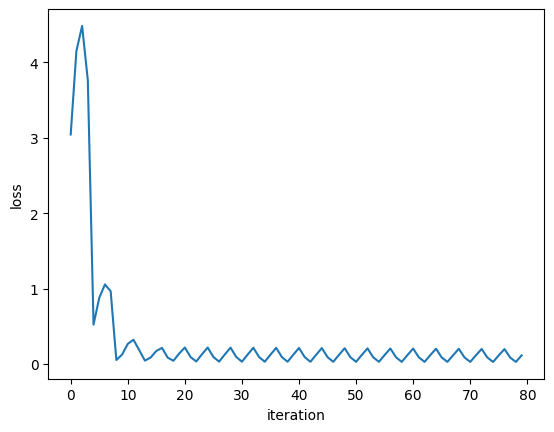

In [229]:
import matplotlib.pyplot as plt

plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

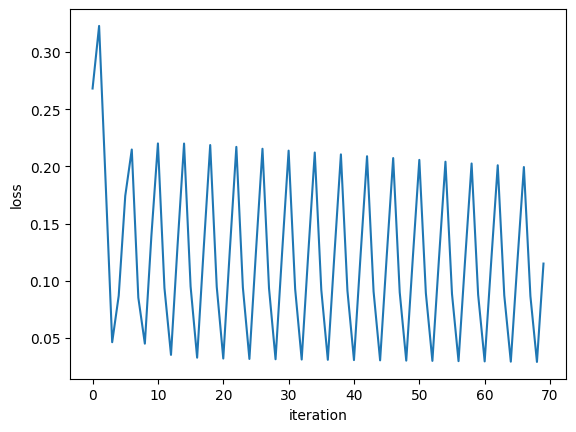

In [233]:
import matplotlib.pyplot as plt

plt.plot(losses[10:]) 
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

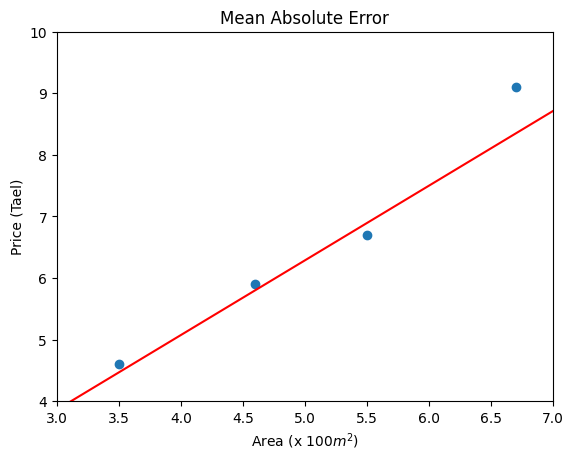

In [234]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

data = np.genfromtxt('data.csv', delimiter=',').tolist()
areas  = get_column(data, 0)
prices = get_column(data, 1)
plt.scatter(areas, prices)

#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Absolute Error')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()